In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-05-23 06:02:09--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-05-23 06:02:09--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.001s  

2022-05-23 06:02:09 (52.0 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



# Упражнение 3.1

Была проверена работа примеров в блокноте chap03.ipynb

B примере с утечкой окно Хэмминга было заменено одним из окон, предоставляемых NumPy.

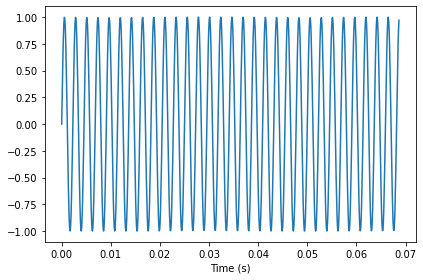

In [2]:
from thinkdsp import SinSignal, decorate
signal = SinSignal(freq=440)
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

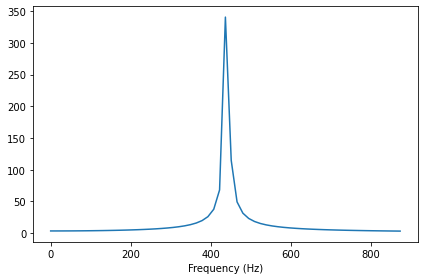

In [3]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

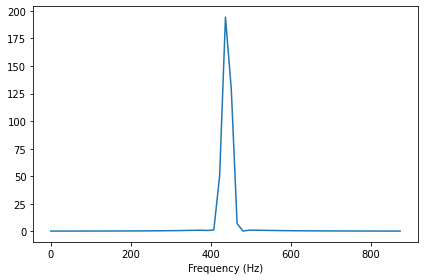

In [4]:
wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

Окно Хэмминга было заменено на окно Блэкмена.

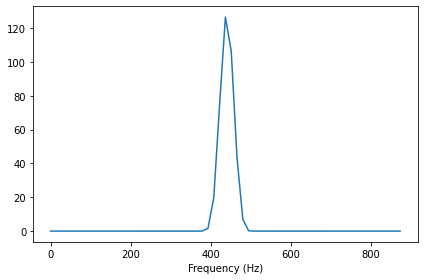

In [5]:
import numpy as np
window = np.blackman(len(wave))
wave.window(window)
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

# Упражнение 3.2

Был написан класс SawtoothChirp, расширяющий Chirp и переопределяющий evaluate для генерации пилообразного сигнала с линейно увеличивающейся/уменьшающейся частотой.


In [6]:
from thinkdsp import Chirp, normalize, unbias
class SawtoothChirp(Chirp):
  def _evaluate(self, ts, freqs):
    dts = np.diff(ts)
    dphis = PI2 * freqs * dts
    phases = np.cumsum(dphis)
    phases = np.insert(phases, 0, 0)
    cycles = phases / PI2
    frac, _ = np.modf(cycles)
    ys = normalize(unbias(frac), self.amp)
    return ys

Был создан пилообразный чирп, меняющийся от 440 Гц (A4) до 3520 Гц (A7).

In [7]:
signal = SawtoothChirp(start=440, end=3520)
wave = signal.make_wave(duration=4, framerate=5000)
wave.make_audio()

При прослушивании аудиозаписи, можно услышать биения.

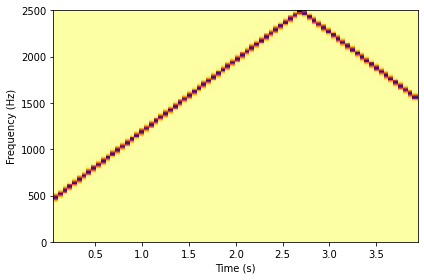

In [8]:
spectrogram = wave.make_spectrogram(seg_length=512)
spectrogram.plot(high=7000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Была построена и распечатана спектрограмма этого сигнала. На ней действительно можно наблюдать эффект биений.

# Упражнение 3.3


Был создан пилообразный чирп, меняющийся от 2500 до 3000 Гц, и на его основе сгенерирован сигнал длительностью 1 с и частотой кадров 20 кГц.

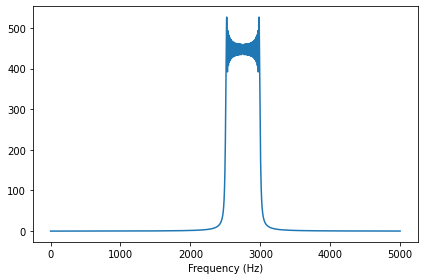

In [9]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
spectrum = wave.make_spectrum()
spectrum.plot(high = 5000)
decorate(xlabel='Frequency (Hz)')

Был распечатан спектр, в нём есть компоненты на каждой частоте от 2500 Гц до 3000 Гц.

# Упражнение 3.4

Был найден звук глиссандо и распечатана спектрограмма первых нескольких секунд. В музыкальной терминологии глиссандо — это нота, меняющаяся от
одной высоты до другой, то есть своеобразный чирп.


In [10]:
from thinkdsp import read_wave
!wget -O rhapblue11924.wav https://github.com/BozhkoAV/ThinkDSP/blob/master/code/rhapblue11924.wav?raw=true
wave = read_wave('rhapblue11924.wav')
segment = wave.segment(start=0, duration=10)
segment.make_audio()

--2022-05-23 06:02:12--  https://github.com/BozhkoAV/ThinkDSP/blob/master/code/rhapblue11924.wav?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BozhkoAV/ThinkDSP/raw/master/code/rhapblue11924.wav [following]
--2022-05-23 06:02:12--  https://github.com/BozhkoAV/ThinkDSP/raw/master/code/rhapblue11924.wav
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/rhapblue11924.wav [following]
--2022-05-23 06:02:12--  https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/rhapblue11924.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HT

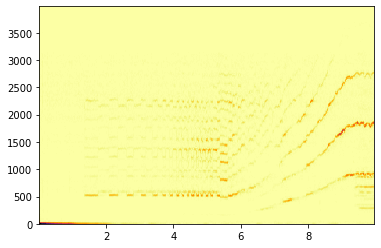

In [11]:
segment.make_spectrogram(512).plot(high=4000)

# Упражнение 3.5

Был написан класс TromboneGliss, расширяющий
Chirp и предоставляющий метод evalute.

In [12]:
from thinkdsp import Chirp
class TromboneGliss(Chirp):
  def _evaluate(self, ts):
    freqs = 1 / np.linspace(1.0 / self.start, 1.0 / self.end, len(ts))
    dts = np.diff(ts, prepend=0)
    dphis = PI2 * freqs * dts
    phases = np.cumsum(dphis)
    ys = self.amp * np.cos(phases)
    return ys

Был создан сигнал, имитирующий глиссандо на тромбоне от C4 до F4, и обратно до C4. С4 — 262 Гц; F4 — 349 Гц.

In [13]:
signal1 = TromboneGliss(262, 349)
wave1 = signal1.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

In [14]:
signal2 = TromboneGliss(349, 262)
wave2 = signal2.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

In [15]:
wave = wave1 | wave2
wave.make_audio()

Была распечатана спектрограмма полученного сигнала.

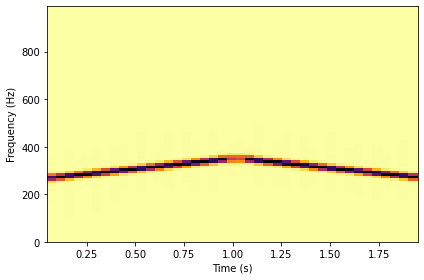

In [16]:
spectrogram = wave.make_spectrogram(1024)
spectrogram.plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Сложно однозначно определить на что похоже глиссандо на тромбоне - на линейный или экспоненциальный чирп.

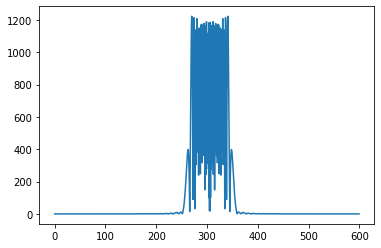

In [17]:
wave.make_spectrum().plot(high = 600)

# Упражнение 3.6

Была найдена запись серии гласных звуков.



In [18]:
if not os.path.exists('87778__marcgascon7__vocals.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/87778__marcgascon7__vocals.wav

--2022-05-23 06:02:15--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/87778__marcgascon7__vocals.wav
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/87778__marcgascon7__vocals.wav [following]
--2022-05-23 06:02:15--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/87778__marcgascon7__vocals.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1399852 (1.3M) [audio/wav]
Saving to: ‘87778__marcgascon7__vocals.wav’

87778__marcgascon7_ 100%[===================>]   1.33M  --.-KB/s    in 0.01s   

2022-05-23 06:02:15 (108 MB/s) - ‘87778__m

In [19]:
wave = read_wave('87778__marcgascon7__vocals.wav')
wave.make_audio()

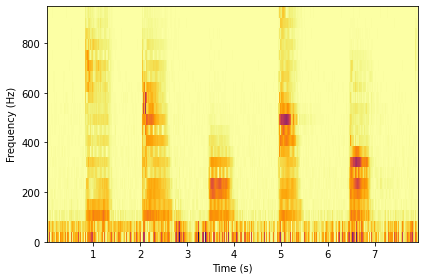

In [20]:
wave.make_spectrogram(1024).plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Разные гласные можно разлисить по спектрам их сегментов.

Спектр гласной "А":

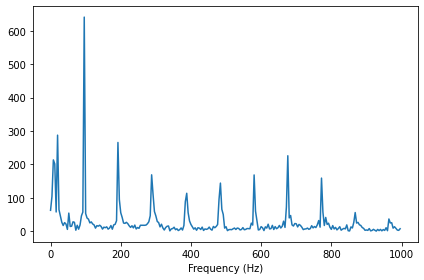

In [21]:
segment = wave.segment(start=1, duration=0.25)
segment.make_spectrum().plot(high=1000)
decorate(xlabel='Frequency (Hz)')

Спектр гласной "Э":

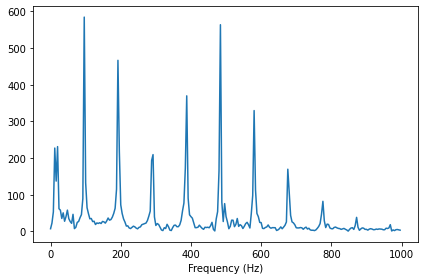

In [22]:
segment = wave.segment(start=2.2, duration=0.25)
segment.make_spectrum().plot(high=1000)
decorate(xlabel='Frequency (Hz)')

Спектр гласной "И":

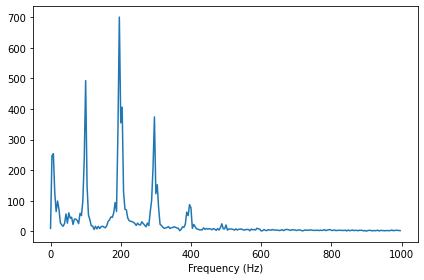

In [23]:
segment = wave.segment(start=3.5, duration=0.25)
segment.make_spectrum().plot(high=1000)
decorate(xlabel='Frequency (Hz)')

Спектр гласной "О":

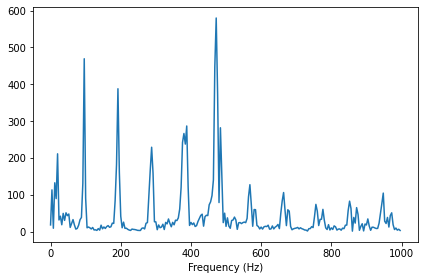

In [24]:
segment = wave.segment(start=5.1, duration=0.25)
segment.make_spectrum().plot(high=1000)
decorate(xlabel='Frequency (Hz)')

Спектр гласной "У":

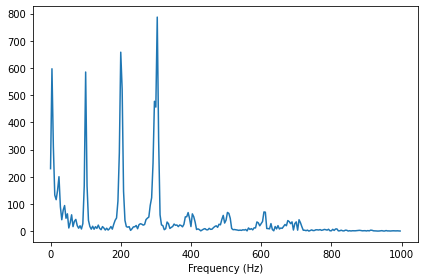

In [25]:
segment = wave.segment(start=6.5, duration=0.25)
segment.make_spectrum().plot(high=1000)
decorate(xlabel='Frequency (Hz)')